# 2019 Data analytics Lab - week 13
## Machine learning and Deep learning

### Contents
- Generalized linear model
- k-Nearest neighbor
- Support vector machine
- Random forest
- Multi-layer perceptron (Deep learning)
- Evaluation & validation

### Used library
- Numpy
- Scipy
- Matplotlib
- Seaborn
- Sci-kit learn
- Keras(in Tensorflow 2.0)

## Data
### Regression: Boston house prices dataset
- Source: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
- API: https://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset

#### Predictive
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population

#### Target
- MEDV: Median value of owner-occupied homes in $1000’s


In [1]:
# 현실 문제에서는 이렇게 바로 다 때려넣는게 아니라, 정교한 Data engineering이 필요함
# 제공되는 데이터셋은 기본적으로 Engineering된 Data이기 때문에 바로 쓰는게 가능한 일
%matplotlib inline

from sklearn.datasets import load_boston
X_reg = load_boston().data
y_reg = load_boston().target

print(X_reg[0:3])
print(X_reg.shape)
print(y_reg[0:3])
print(y_reg.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]
(506, 13)
[24.  21.6 34.7]
(506,)


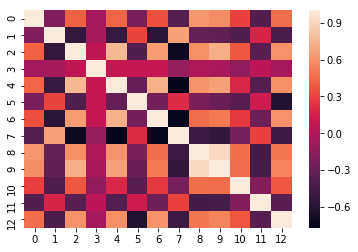

In [2]:
import seaborn as sns
import pandas as pd

corr=pd.DataFrame(X_reg).corr()
sns.heatmap(corr)

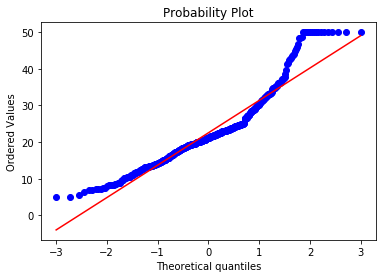

In [3]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
res = probplot(y_reg, plot=plt)

### Classification: Breast cancer wisconsin (diagnostic) dataset
- Source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
- API: https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset

#### Predictive
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension (“coastline approximation” - 1)

The mean, standard error, and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

#### Target
- WDBC-Malignant
- WDBC-Benign

In [4]:
from sklearn.datasets import load_breast_cancer
X_cls = load_breast_cancer().data
y_cls = load_breast_cancer().target
print(y_cls[0:3])
print(y_cls.shape)

[0 0 0]
(569,)


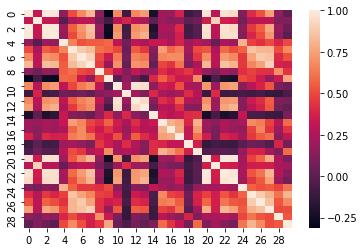

In [5]:
corr=pd.DataFrame(X_cls).corr()
sns.heatmap(corr)

In [6]:
from collections import Counter
Counter(y_cls)

Counter({0: 212, 1: 357})

### Generalized linear model
#### Regression: LASSO regression

In [7]:
from sklearn.linear_model import Lasso
reg_linear = Lasso(alpha=0.1)
reg_linear.fit(X_reg, y_reg)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### Classification: Logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression
cls_linear = LogisticRegression(solver='lbfgs', max_iter=10000)
cls_linear.fit(X_cls, y_cls)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### k-Nearest neighbor
#### Regression

In [9]:
from sklearn.neighbors import KNeighborsRegressor
reg_neigh = KNeighborsRegressor(n_neighbors=2)
reg_neigh.fit(X_reg, y_reg) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

#### Classification

In [10]:
from sklearn.neighbors import KNeighborsClassifier
cls_neigh = KNeighborsClassifier(n_neighbors=3)
cls_neigh.fit(X_cls, y_cls)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Random forest
#### Regression

In [11]:
from sklearn.ensemble import RandomForestRegressor
reg_forest = RandomForestRegressor(n_estimators=100, max_depth=3,random_state=0)
reg_forest.fit(X_reg, y_reg) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

#### Classification

In [12]:
from sklearn.ensemble import RandomForestClassifier
cls_forest = RandomForestClassifier(n_estimators=100, max_depth=3,random_state=0)
cls_forest.fit(X_cls, y_cls)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Support vector machine
#### Regression

In [13]:
from sklearn.svm import SVR
reg_svm = SVR(gamma='scale', C=1.0, epsilon=0.2)
reg_svm.fit(X_reg, y_reg)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Classification

In [14]:
from sklearn.svm import SVC
cls_svm = SVC(gamma='auto')
cls_svm.fit(X_cls, y_cls)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Multi-layer perceptron
#### Regression

In [15]:
from sklearn.neural_network import MLPRegressor
reg_mlp = MLPRegressor(alpha=1e-5, hidden_layer_sizes=(32, 32), max_iter=10000)
reg_mlp.fit(X_reg, y_reg)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(32, 32), learning_rate='constant',
             learning_rate_init=0.001, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

#### Classification

In [16]:
from sklearn.neural_network import MLPClassifier
cls_mlp = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(32, 32), max_iter=10000)
cls_mlp.fit(X_cls, y_cls)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(32, 32), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### Ensemble
#### Regression: Voting (Average)

In [17]:
# 0.21버전에서 새로 생긴 모듈
from sklearn.ensemble import VotingRegressor
reg_ensemble = VotingRegressor([('lasso',Lasso(alpha=0.1)), 
                                ('knn',KNeighborsRegressor(n_neighbors=2)), 
                                ('forest', RandomForestRegressor(n_estimators=100, max_depth=3,random_state=0)), 
                                ('svm', SVR(gamma='scale', C=1.0, epsilon=0.2)), 
                                ('mlp',MLPRegressor(alpha=1e-5, hidden_layer_sizes=(32, 32), max_iter=10000))])
reg_ensemble.fit(X_reg, y_reg)

VotingRegressor(estimators=[('lasso',
                             Lasso(alpha=0.1, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False)),
                            ('knn',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=2,
                                                 p=2, weights='uni...
                                          batch_size='auto', beta_1=0.9,
                                          beta_2=0.999, early_stopping=False,
                                          epsilon=1e-

#### Classification: Voting

In [18]:
from sklearn.ensemble import VotingClassifier
cls_ensemble = VotingClassifier([('lasso',LogisticRegression(solver='lbfgs', max_iter=10000)), 
                                 ('knn',KNeighborsClassifier(n_neighbors=3)), 
                                 ('forest', RandomForestClassifier(n_estimators=100, max_depth=3,random_state=0)), 
                                 ('svm', SVC(gamma='auto')), 
                                 ('mlp',MLPClassifier(alpha=1e-5, hidden_layer_sizes=(32, 32), max_iter=10000))])
cls_ensemble.fit(X_cls, y_cls)

VotingClassifier(estimators=[('lasso',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=10000,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkows...
                                            

### Evaluation
#### Regression

In [19]:
models_reg = [('lasso', reg_linear), 
              ('knn', reg_neigh), 
              ('forest',reg_forest), 
              ('svm', reg_svm), 
              ('mlp', reg_mlp),
              ('ensemble', reg_ensemble)]
for name, model in models_reg:#r^2
    print(f'{name}: {model.score(X_reg, y_reg)}')

lasso: 0.7269834862602695
knn: 0.8562711854960806
forest: 0.869183424060846
svm: 0.2087412245500736
mlp: 0.7950415167498976
ensemble: 0.825099456498701


#### Regression metrics
https://scikit-learn.org/stable/modules/classes.html#regression-metrics  

- metrics.explained_variance_score(y_true, y_pred)  
- metrics.max_error(y_true, y_pred)  
- metrics.mean_absolute_error(y_true, y_pred)   
- metrics.mean_squared_error(y_true, y_pred)   
- metrics.mean_squared_log_error(y_true, y_pred)  
- metrics.median_absolute_error(y_true, y_pred)   
- metrics.r2_score(y_true, y_pred) 	 

In [20]:
from sklearn.metrics import mean_absolute_error
for name, model in models_reg:
    print(f'{name}: {mean_absolute_error(y_reg, model.predict(X_reg))}')

lasso: 3.328223119224212
knn: 2.2265810276679843
forest: 2.50974673879765
svm: 5.25898055850099
mlp: 2.969101791283392
ensemble: 2.5633070086083123


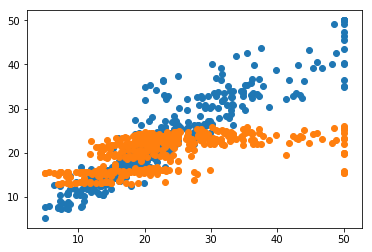

In [21]:
plt.scatter(y_reg, reg_neigh.predict(X_reg))
plt.scatter(y_reg, reg_svm.predict(X_reg))

#### Classification

In [22]:
models_cls = [('logistic', cls_linear), 
              ('knn', cls_neigh),
              ('forest', cls_forest), 
              ('svm', cls_svm), 
              ('mlp', cls_mlp),
              ('ensemble', cls_ensemble)]
for name, model in models_cls: #mean accuracy
    print(f'{name}: {model.score(X_cls, y_cls)}')

logistic: 0.9578207381370826
knn: 0.9560632688927944
forest: 0.9736379613356766
svm: 1.0
mlp: 0.9367311072056239
ensemble: 0.9753954305799648


#### Classification metrics
https://scikit-learn.org/stable/modules/classes.html#classification-metrics  

- metrics.accuracy_score(y_true, y_pred[, …]) 
- metrics.auc(x, y[, reorder]) 	
- metrics.average_precision_score(y_true, y_score) 
- metrics.balanced_accuracy_score(y_true, y_pred) 	
- metrics.brier_score_loss(y_true, y_prob[, …]) 
- metrics.classification_report(y_true, y_pred) 	
- metrics.cohen_kappa_score(y1, y2[, labels, …]) 
- metrics.confusion_matrix(y_true, y_pred[, …]) 	
- metrics.f1_score(y_true, y_pred[, labels, …]) 	
- metrics.fbeta_score(y_true, y_pred, beta[, …]) 	
- metrics.hamming_loss(y_true, y_pred[, …]) 	
- metrics.hinge_loss(y_true, pred_decision[, …]) 	
- metrics.jaccard_score(y_true, y_pred[, …]) 	
- metrics.log_loss(y_true, y_pred[, eps, …]) 	
- metrics.matthews_corrcoef(y_true, y_pred[, …]) 	
- metrics.multilabel_confusion_matrix(y_true, …) 
- metrics.precision_recall_curve(y_true, …) 	
- metrics.precision_recall_fscore_support(…) 
- metrics.precision_score(y_true, y_pred[, …]) 	
- metrics.recall_score(y_true, y_pred[, …]) 	
- metrics.roc_auc_score(y_true, y_score[, …]) 	
- metrics.roc_curve(y_true, y_score[, …]) 	
- metrics.zero_one_loss(y_true, y_pred[, …])

In [23]:
from sklearn.metrics import log_loss
for name, model in models_cls:
    print(f'{name}: {log_loss(y_cls, model.predict(X_cls))}')

logistic: 1.4568411730040594
knn: 1.5175476313250285
forest: 0.9105280166878609
svm: 9.992007221626415e-16
mlp: 2.185266677943708
ensemble: 0.8498257741705659


### Data split
- Over-fitting / Under-fitting 여부를 판단하기 위한 가장 보편적인 수단

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cls,y_cls, test_size=0.2, shuffle=True, stratify=y_cls)
print(f'X_cls.shape: {X_cls.shape}')
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')

print(f'y_cls.shape: {y_cls.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

X_cls.shape: (569, 30)
X_train.shape: (455, 30)
X_test.shape: (114, 30)
y_cls.shape: (569,)
y_train.shape: (455,)
y_test.shape: (114,)


In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=30, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=2)

Train on 455 samples, validate on 114 samples
Epoch 1/10
455/455 - 1s - loss: 4.3529 - accuracy: 0.4747 - val_loss: 1.2226 - val_accuracy: 0.4737
Epoch 2/10
455/455 - 0s - loss: 1.2104 - accuracy: 0.5582 - val_loss: 0.8381 - val_accuracy: 0.6754
Epoch 3/10
455/455 - 0s - loss: 0.6741 - accuracy: 0.7758 - val_loss: 0.5777 - val_accuracy: 0.7632
Epoch 4/10
455/455 - 0s - loss: 0.4450 - accuracy: 0.8462 - val_loss: 0.4612 - val_accuracy: 0.8333
Epoch 5/10
455/455 - 0s - loss: 0.3220 - accuracy: 0.9143 - val_loss: 0.3425 - val_accuracy: 0.8596
Epoch 6/10
455/455 - 0s - loss: 0.2502 - accuracy: 0.9187 - val_loss: 0.4405 - val_accuracy: 0.8421
Epoch 7/10
455/455 - 0s - loss: 0.2623 - accuracy: 0.8945 - val_loss: 0.3305 - val_accuracy: 0.8596
Epoch 8/10
455/455 - 0s - loss: 0.2110 - accuracy: 0.9165 - val_loss: 0.3441 - val_accuracy: 0.8684
Epoch 9/10
455/455 - 0s - loss: 0.2607 - accuracy: 0.9011 - val_loss: 0.3068 - val_accuracy: 0.8772
Epoch 10/10
455/455 - 0s - loss: 0.2481 - accuracy: 0.

In [26]:
print(model.metrics_names)
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

['loss', 'accuracy']
455/455 [==============================] - 0s 101us/sample - loss: 0.1964 - accuracy: 0.9341
[0.19635957963764666, 0.93406594]
114/114 [==============================] - 0s 114us/sample - loss: 0.3165 - accuracy: 0.8947
[0.316543087624667, 0.8947368]


### Cross validation

In [27]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
for train_index, test_index in kfold.split(X_reg):
    X_train, X_test = X_reg[train_index], X_reg[test_index]
    y_train, y_test = y_reg[train_index], y_reg[test_index]